#📌 Extracción

In [1]:
# Blibliotecas
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)

datos = response.json()
df = pd.DataFrame(datos)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
df_normalizado = pd.json_normalize(datos)
df_normalizado.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [4]:
# Explorar las columnas del dataset y verificar sus tipos de datos.
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
# Conociendo el tipo de datos de cada columna.
df_normalizado.dtypes


,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


####**Consultar el diccionario para comprender mejor el significado de las variables**


**Diccionario de datos**

customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del dispositivo

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas
Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

####Columnas importantes a considerar para análisis

**Churn**

**tenure**

**PhoneService**

**MultipleLines**

**InternetSecurity**

**Contract**

**Charges.Monthly**

**Charges.Total**

####**Comprobación de incoherencias en los datos**

In [6]:
# Búsqueda de Valores únicos en cada una de las columnas

for col in df_normalizado.columns:
  print(f"Columna: {col}")
  print(f'Valores únicos : {df_normalizado[col].nunique()}')
  if df_normalizado[col].nunique() < 40:
    print(df_normalizado[col].unique())
    print("-" * 40)

Columna: customerID
Valores únicos : 7267
Columna: Churn
Valores únicos : 3
['No' 'Yes' '']
----------------------------------------
Columna: customer.gender
Valores únicos : 2
['Female' 'Male']
----------------------------------------
Columna: customer.SeniorCitizen
Valores únicos : 2
[0 1]
----------------------------------------
Columna: customer.Partner
Valores únicos : 2
['Yes' 'No']
----------------------------------------
Columna: customer.Dependents
Valores únicos : 2
['Yes' 'No']
----------------------------------------
Columna: customer.tenure
Valores únicos : 73
Columna: phone.PhoneService
Valores únicos : 2
['Yes' 'No']
----------------------------------------
Columna: phone.MultipleLines
Valores únicos : 3
['No' 'Yes' 'No phone service']
----------------------------------------
Columna: internet.InternetService
Valores únicos : 3
['DSL' 'Fiber optic' 'No']
----------------------------------------
Columna: internet.OnlineSecurity
Valores únicos : 3
['No' 'Yes' 'No internet 

In [7]:
# Búsqueda de valores nulos
print(f'Número de Valores Nulos',df_normalizado.isnull().sum())

Número de Valores Nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [8]:
#Búsqueda de valores duplicados
print(f'Número de valores Duplicados',df_normalizado.duplicated().sum())

Número de valores Duplicados 0


In [9]:
#Búsqueda de Vacíos o en blanco
import numpy as np

df_normalizado.apply(lambda x:x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


**Acá nos damos cuenta que en las columnas Churn faltan  224 valores y tambien en Charge Total con 11, por lo tanto se debe analizar si se eliminan o de ponderan**

In [10]:
# Transformación columna account.Charges.Total

df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'],errors='coerce')


In [11]:
df_normalizado['account.Charges.Total'].dtype

dtype('float64')

In [12]:
# Eliminación de columnas de Churn

df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() !='']
print(f'Número de filas despues de eliminar valores nulos',len(df_normalizado))

Número de filas despues de eliminar valores nulos 7043


In [13]:
# eliminación de Vacíos o en blanco en nuestros datos

df_normalizado.apply(lambda x:x.astype(str).str.strip()=='').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [14]:
# Resumen Estadístico de los Datos
df_normalizado.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
# Creando columna de Cuentas Diarias 'account.Daily.Charges'

df_normalizado['account_daily_charges']= df_normalizado['account.Charges.Monthly']/ 30
print(df_normalizado[['account.Charges.Monthly', 'account_daily_charges']].head(10))

   account.Charges.Monthly  account_daily_charges
0                    65.60               2.186667
1                    59.90               1.996667
2                    73.90               2.463333
3                    98.00               3.266667
4                    83.90               2.796667
5                    69.40               2.313333
6                   109.70               3.656667
7                    84.65               2.821667
8                    48.20               1.606667
9                    90.45               3.015000


In [16]:
# Analizando y verificnado que contienen el mismo número de filas

print("Filas en df_normalizado:", len(df_normalizado))

print("Filas en account_daily_charges:", len(df_normalizado['account_daily_charges']))

Filas en df_normalizado: 7043
Filas en account_daily_charges: 7043


In [17]:
# agregando la nueva columna a nuestro Data Frame

df_normalizado['account_daily_charges'] = df_normalizado['account.Charges.Monthly']/ 30

In [18]:
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account_daily_charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

In [22]:
!pip install -U plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [19]:
!pip install -U kaleido

In [22]:
import kaleido
kaleido.get_chrome_sync()

PosixPath('/usr/local/lib/python3.11/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome')

In [20]:
import plotly.express as px
import plotly.io as pio
import pandas as pd
import requests


url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)

datos = response.json()
df = pd.DataFrame(datos)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##****Visualización y Análisis de los Datos****

In [23]:
# Análisis de Churn por Sexo


fig = px.histogram(df_normalizado, x='customer.gender',text_auto=True,  color='Churn', title='Distribución de Churn por Género', barmode='group',
color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'}, labels={'customer.gender': 'Género del Cliente', 'count': 'Cantidad'},
    template='plotly_white')
fig.update_layout(title=dict(x=0.5, xanchor='center'))

fig.show()
fig.write_image("grafico_churn_genero.png")


### Churn por Género
![Churn por Género](graficos/grafico_churn_genero.png)

Conclusión: De aqui concluimos que el comportamiento de los clientes Churn no tiene mayor diferencia en cuanto al Género de los clientes, el comportamientos en ambos es similar.

In [24]:
# Análisis de Churn por Edad (mayor, menor o igual a 65 años)
fig = px.histogram(df_normalizado, x='customer.SeniorCitizen',text_auto=True, color='Churn', title='Comportamiento Clientes Mayores de 65 años', barmode='group',
color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'}, labels={'customer.SeniorCitizen': 'customer.SeniorCitizen', 'count': 'Cantidad'},
    template='plotly_white')
fig.update_layout(title=dict(x=0.5, xanchor='center'))

fig.show()
fig.write_image("customer.SeniorCitizen.png")

### Clientes Senior
![Clientes Senior](graficos/customer.SeniorCitizen.png)

Conclusión: De aqui concluimos que la cantidad de clientes Churn   mayores de 65 años es relativamente menor mientras que en los clientes menores de 65 años el porcentaje de clientes Churn es del 23,06%

In [25]:
# Análisis de Churn según (meses de contrato del cliente)
fig = px.histogram(df_normalizado, x='customer.tenure',text_auto=True, color='Churn', title='Comportamiento Clientes por Antiguedad de Contrato', barmode='group',
color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'}, labels={'customer.tenure': 'customer.tenure', 'count': 'Cantidad'},
    template='plotly_white')
fig.update_layout(title=dict(x=0.5, xanchor='center'))

fig.show()
fig.write_image("customer.tenure.png")

### Antigüedad de los Clientes
![Antigüedad de los Clientes](graficos/customer.tenure.png)

Conclusión: De aqui concluimos que la cantidad de clientes Churn se encuentran distribuidos en los primeros meses de contrato,despues con el tiempo de permanencia en la compañia los clientes mantienen un mejor comportamiento.

In [26]:
# Analizamos los clientes Churn según la antiguedad,almacenados en variable (df_agrupados)
df_agrupados  = df_normalizado.groupby(['customer.tenure','Churn']).size().unstack(fill_value=0)

# Analisis porcentajes clientes que evaden
df_agrupados['Churn_rate'] = (df_agrupados.get('Yes',0) / (df_agrupados.sum(axis=1)) * 100).round(2)
print(df_agrupados[['Churn_rate']])

Churn            Churn_rate
customer.tenure            
0                      0.00
1                     61.99
2                     51.68
3                     47.00
4                     47.16
...                     ...
68                     9.00
69                     8.42
70                     9.24
71                     3.53
72                     1.66

[73 rows x 1 columns]


In [28]:
# gráficamos los resultados

fig = px.line(df_agrupados.reset_index(),x='customer.tenure', y='Churn_rate',markers=True,title='Tasa de Churn (%) por Antiguedad de Contrato')

fig.update_traces(
    line=dict(color='#1f77b4', width=2.5),
    marker=dict(size=6, color='#ff7f0e')
)

fig.update_layout(
    title=dict(x=0.5, xanchor='center', font=dict(size=18)),
    xaxis_title="Antigüedad del Cliente (meses)",
    yaxis_title="Tasa de Churn (%)",
    template="plotly_white",
    font=dict(size=13)
)

fig.show()
fig.write_image("churn_vs_contrato.png")


### Churn vs Tipo de Contrato
![Churn vs Contrato](graficos/churn_vs_contrato.png)

El gráfico representa de mejor manera el comportamiento de la variable de intéres Churn según la antiguedad de contrato de los clientes, es evidente que la mayor porcentaje de evasión ocurre en los primeros meses de contrato despues al pasar del tiempo la tasa de Churn disminuye significativamente.

In [29]:
# Análisis de Antiguedad y los cargos mensuales de los clientes Churn

fig = px.scatter(
    df_normalizado,
    x='customer.tenure',
    y='account.Charges.Monthly',
    color='Churn',
    title='Relación entre Antigüedad y Cargos Mensuales según Churn',
    opacity=0.7,
    color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'}
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='black')))

fig.update_layout(
    title=dict(x=0.5, xanchor='center', font=dict(size=18)),
    xaxis_title="Antigüedad del Cliente (meses)",
    yaxis_title="Cargos Mensuales ($)",
    template="plotly_white",
    font=dict(size=13)
)

fig.show()
fig.write_image("relación_antiguedad_cargos_mensuales.png")


### Relación Antigüedad y Cargos Mensuales
![Relación Antigüedad y Cargos Mensuales](graficos/relación_antiguedad_cargos_mensuales.png)

La mayor tasa de abandono (churn) se concentra en clientes nuevos y aquellos con cargos mensuales superiores a 70 USD, mientras que los clientes con mayor antigüedad muestran una deserción menor. Esto indica que los principales problemas son la prematura pérdida de clientes y la sensibilidad al precio. Para mejorar, se proponen tres acciones:

(1) Implementar un programa de retención temprana con descuentos y soporte prioritario durante los primeros meses.

(2) Oferta de  planes flexibles y beneficios a clientes con cargos altos para reducir la probabilidad de que abandonen.

(3) Establecer un sistema de monitoreo y alertas tempranas que permita detectar clientes en riesgo y aplicar acciones proactivas, como encuestas de satisfacción o promociones personalizadas. Estas medidas buscan reducir el churn inicial, fidelizar a los clientes de mayor gasto y aumentar la estabilidad y rentabilidad de la compañía.

In [30]:
# Análisis de Churn por Según el Tipo de contrato (Account.Contract)

fig = px.histogram(df_normalizado, x='account.Contract',text_auto=True, color='Churn', title='Comportamiento Clientes por tipo de Contrato', barmode='group',
color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'}, labels={'account.Contract': 'account.Contract', 'count': 'Cantidad'},
    template='plotly_white')
fig.update_layout(title=dict(x=0.5, xanchor='center'))

fig.show()
fig.write_image("tipo_contrato.png")


### Tipo de Contrato
![Tipo de Contrato](graficos/tipo_contrato.png)

El análisis de churn por tipo de contrato revela que la mayor deserción ocurre en clientes con contrato mensual (month-to-month, 74,54%), mientras que los contratos anuales (one year) presentan un churn moderado (11,26%) y los bianuales (two year) muestran la menor tasa de abandono (2,9%). Esto indica que los clientes sin compromiso a largo plazo son los más propensos a abandonar el servicio. Para mejorar la retención, se sugieren tres estrategias:

(1) Incentivar la transición a contratos más largos mediante descuentos o beneficios adicionales.

(2) Fortalecer la experiencia de los clientes month-to-month con soporte proactivo y ofertas personalizadas durante los primeros meses.

(3) Monitorear y detectar clientes en riesgo de abandonar, aplicando campañas de fidelización dirigidas para reducir la deserción temprana. Estas acciones buscan disminuir el churn, aumentar la estabilidad y mejorar la rentabilidad de la compañía.

In [31]:
# Análisis Box plot de Churn por cargos mensuales

fig = px.box(
    df_normalizado,
    x='Churn',
    y='account.Charges.Monthly',
    color='Churn',
    color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'},
    title='Distribución de Cargos Mensuales según Churn',

)

# Mejorar estilo
fig.update_layout(
    title=dict(x=0.5, xanchor='center', font=dict(size=18)),
    xaxis_title="Churn",
    yaxis_title="Cargos Mensuales ($)",
    template="plotly_white",
    font=dict(size=13)
)

fig.show()
fig.write_image("boxplot_cargos_mensuales_por_churn.png")

### Boxplot de Cargos Mensuales por Churn
![Boxplot Cargos Mensuales por Churn](graficos/boxplot_cargos_mensuales_por_churn.png)

Analizando los gráficos boxplot se puede deducir lo siguiente:
Los clientes fieles tanto en el primer cuartil, la media y 3 cuartil pagan mucho menos que los clientes Churn de aqui la tendencia de abandono haciendo que los clientes con valores moderados  muestren mayor permanencia en la compañía.
Entonces  concluimos que el precio es un valor crítico en los rangos altos, para poder mejorar se puede implentar estrategias como planes flexibles o mejores decuentos para los clientes con alto costo ademas de un monitoreo a los clientes de riesgo asi como campañas de fidelización enfocada a clientes premium.

In [32]:
# Análisis por Servicios
#phone.PhoneService
fig = px.histogram(df_normalizado, x='phone.PhoneService',text_auto=True, color='Churn', title='Comportamiento Clientes por Servicio Telefónico', barmode='group',
color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'}, labels={'phone.PhoneService': 'phone.PhoneService', 'count': 'Cantidad'},
    template='plotly_white')
fig.update_layout(title=dict(x=0.5, xanchor='center'))

fig.show()
fig.write_image("churn_phone.PhoneService.png")

### Churn y Servicio de Teléfono
![Churn Phone Service](graficos/churn_phone.PhoneService.png)

El análisis de churn según el servicio telefónico muestra que los clientes con PhoneService activo tienen una tasa de abandono de 36,4%, mientras que los clientes sin servicio telefónico presentan un churn ligeramente menor de 33,2%. Esto indica que tener el servicio telefónico no reduce significativamente la deserción, y que otros factores (como tipo de contrato o cargos mensuales) podrían tener un mayor impacto en la retención. Aunque la diferencia es pequeña, la compañía podría investigar si los clientes con teléfono están vinculados a planes más costosos o combinados, lo que podría influir en su decisión de abandonar.


In [33]:
# Servicio de Internet (internet.InternetService)
fig = px.histogram(df_normalizado, x='internet.InternetService',text_auto=True, color='Churn', title='Comportamiento Clientes por Servicio de Internet', barmode='group',
color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'}, labels={'internet.InternetService': 'internet.InternetService', 'count': 'Cantidad'},
    template='plotly_white')
fig.update_layout(title=dict(x=0.5, xanchor='center'))

fig.show()
fig.write_image("churn_internet.InternetService.png")

### Churn y Servicio de Internet
![Churn Internet Service](graficos/churn_internet.InternetService.png)


El análisis de churn según el tipo de servicio de internet revela diferencias marcadas: los clientes con fibra óptica presentan la mayor tasa de abandono (72%), mientras que los que tienen DSL muestran un churn moderado (23,3%) y los clientes sin internet tienen la menor deserción (7,9%). Esto sugiere que los clientes con fibra óptica, aunque disfrutan de mayor velocidad, podrían estar más expuestos a precios elevados, promociones de la competencia o expectativas de servicio más altas, lo que aumenta su probabilidad de abandonar. Por su parte, los clientes sin internet muestran menor churn, posiblemente porque tienen contratos simples o menos opciones de comparación.

Posibles causas:

Precios más altos de los planes de fibra óptica.

Expectativas de velocidad y servicio más estrictas, que pueden generar insatisfacción.

Mayor competencia en el segmento de fibra óptica.
Este hallazgo indica que la compañía debe evaluar precios, beneficios y atención a clientes premium para reducir el churn.

In [34]:
# Servicio de Streaming TV

fig = px.histogram(df_normalizado, x='internet.StreamingTV',text_auto=True, color='Churn', title='Comportamiento Clientes por Servicio Streaming TV', barmode='group',
color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'}, labels={'internet.StreamingTV': 'internet.StreamingTV', 'count': 'Cantidad'},
    template='plotly_white')
fig.update_layout(title=dict(x=0.5, xanchor='center'))

fig.show()
fig.write_image("churn_internet.StreamingTV.png")


### Churn y Streaming TV
![Churn Streaming TV](graficos/churn_internet.StreamingTV.png)


El análisis de churn según el servicio de streaming muestra que los clientes que tienen contratado el streaming presentan un churn de 43%, mientras que los que no tienen streaming pero sí internet presentan un churn más alto de 50%. Por su parte, los clientes sin servicio de internet mantienen la menor deserción (7,9%). Esto indica que contar con un servicio adicional como el streaming puede ayudar a retener clientes, aunque no elimina por completo la deserción. Por otro lado, los clientes con internet pero sin streaming podrían sentirse con menos beneficios comparativos, aumentando su probabilidad de abandonar.

Posibles causas:

El streaming incrementa el valor percibido del paquete y ayuda a fidelizar clientes.

Clientes sin streaming pueden buscar servicios más completos en la competencia.

La baja deserción en clientes sin internet refleja que su perfil y contratos son más simples y menos sujetos a comparación.

In [35]:
# Análisis del Método de Pago (account.PaymentMethod)

fig = px.histogram(df_normalizado, x='account.PaymentMethod',text_auto=True, color='Churn', title='Comportamiento Clientes según el Método de Pago', barmode='group',
color_discrete_map={'Yes': '#1f77b4', 'No': '#ff7f0e'}, labels={'account.PaymentMethod': 'account.PaymentMethod', 'count': 'Cantidad'},
    template='plotly_white')
fig.update_layout(title=dict(x=0.5, xanchor='center'))

fig.show()
fig.write_image("churn_account.PaymentMethod.png")

### Churn y Método de Pago
![Churn Payment Method](graficos/churn_account.PaymentMethod.png)

Los clientes que usan cheques electrónicos presentan la mayor tasa de abandono (82,7%), mientras que los que pagan con tarjeta de crédito (17,9%), transferencia bancaria (20,06%) y cheques por correo (23,6%) tienen tasas mucho más bajas. Esto sugiere que los métodos de pago electrónicos pueden estar asociados a mayor rotación, posiblemente por inconvenientes en la plataforma de pago, menor compromiso percibido o problemas de confianza en el cobro automático.

Posibles causas:

Inseguridad o dificultad de uso de los cheques electrónicos.
Menor vinculación del cliente al servicio cuando se usa pago automático sin interacción directa.

Clientes con cheques electrónicos podrían ser más sensibles al precio o explorar alternativas más fácilmente.

3 sugerencias para reducir churn:

Mejorar la experiencia y confiabilidad de los pagos electrónicos, asegurando facilidad y seguridad.

Incentivar el uso de tarjetas de crédito o transferencias, ofreciendo descuentos o beneficios por estos métodos.

Implementar alertas y recordatorios para pagos electrónicos para evitar fallas y frustración del cliente.

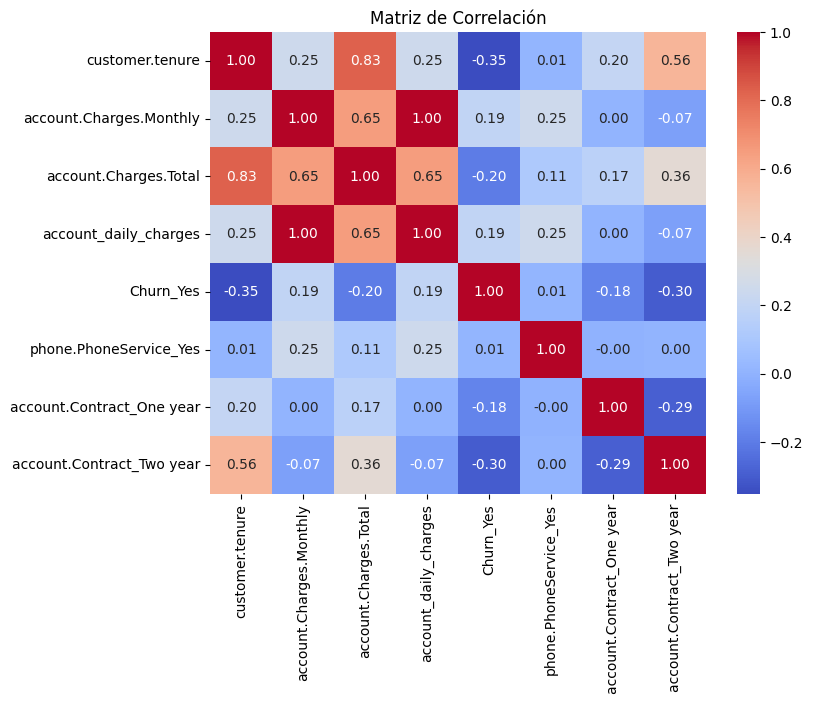

In [36]:
# Análisis de Correlación
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables
df_corr = df_normalizado[['Churn', 'customer.tenure', 'phone.PhoneService', 'account.Contract',
                          'account.Charges.Monthly', 'account.Charges.Total','account_daily_charges']]

# Convertir categóricas a dummies automáticamente
df_corr_encoded = pd.get_dummies(df_corr, drop_first=True)

# Calcular matriz de correlación
corr_matrix = df_corr_encoded.corr()

# Visualizar con seaborn
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

#📄Informe final

Introducción

En el proyecto “Churn de Clientes” de Telecom X, el objetivo principal es comprender los factores que generan la evasión de clientes y proponer estrategias para reducir la deserción. A través del análisis de datos, se busca identificar patrones de comportamiento, servicios contratados y características de los clientes que influyen en su decisión de cancelar los servicios. El enfoque combina técnicas de ETL, análisis exploratorio de datos (EDA) y visualización, utilizando Python y sus principales bibliotecas, con el fin de transformar los datos en información estratégica para la compañía.

Desglose de las etapas del proyecto:

1️⃣ Extracción (E)
Objetivo: Obtener los datos de los clientes de Telecom X de manera eficiente.
Acción: Importación de datos desde la API de la empresa o desde archivos internos.

Resultado: Se consolidó un dataset completo con información sobre clientes, contratos, servicios y cargos mensuales.

2️⃣ Transformación (T)
Objetivo: Limpiar y preparar los datos para el análisis.

Acción:

Eliminación de valores nulos o inconsistentes.
Normalización de nombres de columnas.
Conversión de variables categóricas a formatos numéricos (por ejemplo, “Churn” y “Contract”).

Resultado: Dataset listo para análisis exploratorio y modelado.

3️⃣ Carga (L)
Objetivo: Organizar los datos transformados en un formato usable.
Acción: Creación de un DataFrame consolidado en Python que permita consultas, cálculos de métricas y visualizaciones.

Resultado: Base de datos estructurada y accesible para análisis posteriores.

4️⃣ Análisis Exploratorio de Datos (EDA)

Objetivo: Identificar patrones, tendencias y relaciones entre variables.

Acción:

Análisis de churn según tipo de contrato, servicios contratados y cargos mensuales.

Visualización de tendencias con histogramas, boxplots y líneas de tasa de churn.
Análisis de correlación entre variables relevantes.

Resultado: Insights clave sobre qué servicios, costos y contratos generan mayor probabilidad de churn.

Conclusión y resultados obtenidos

La mayor tasa de abandono se observa en clientes con contratos month-to-month, fibra óptica y planes de streaming.

Los cargos mensuales altos están asociados a una mayor probabilidad de churn, mientras que clientes con contratos más largos presentan menor deserción.

Métodos de pago como cheques electrónicos también muestran un churn elevado.

La información obtenida permitirá a Telecom X diseñar estrategias de retención, como ajustes en precios, paquetes combinados de servicios y fidelización de clientes de alto riesgo.